In [292]:
!pip install conllu -q

In [293]:
import pandas as pd
import numpy as np

#### Texto de exemplo

Futuramente o arquivo vai ser lido atráves da linha de comando

In [294]:
import requests

redacao = "https://raw.githubusercontent.com/IgorJoaquimn/Can-LLMs-write-good-essays-/main/Reda%C3%A7%C3%B5es/system%20prompt%20matias/Redacao001.txt"
r = requests.get(redacao)
redacao = r.text
print(redacao)

O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional. No entanto, a valorização dessas comunidades enfrenta uma série de desafios que vão desde a falta de políticas públicas adequadas até o preconceito arraigado na sociedade. Como ressalta o antropólogo Darcy Ribeiro em sua obra "O Povo Brasileiro", a miscigenação é um dos pilares da formação do Brasil, e é nas comunidades tradicionais que encontramos as raízes dessa miscigenação, que devem ser preservadas e valorizadas.

Os desafios para a valorização dessas comunidades são multifacetados. Em primeiro lugar, há uma lacuna significativa nas políticas públicas voltadas para a proteção e promoção dos direitos desses povos. O filósofo Paulo Freire, em sua obra "Pedagogia do Oprimido", destaca a importância da educação como ferramenta de transformação social. No entanto, muitas comunidades tradicionais ainda enfrentam 

#### Conectando com o UDPipe

In [295]:
# UDPipe API
url = 'http://lindat.mff.cuni.cz/services/udpipe/api/process'

# Dados que a API precisa
data = {
    'tokenizer': '',
    'tagger': '',
    'parser': '',
    'model': "portuguese-bosque-ud-2.12-230717",
    'data': redacao
}
response = requests.post(url, data=data)
print('Resposta:', response.text)


Resposta: {
 "model": "portuguese-bosque-ud-2.12-230717",
 "acknowledgements": [
  "http://ufal.mff.cuni.cz/udpipe/2#udpipe2_acknowledgements",
  "https://ufal.mff.cuni.cz/udpipe/2/models#universal_dependencies_212_models"
 ],
 "result": "# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe\n# udpipe_model = portuguese-bosque-ud-2.12-230717\n# udpipe_model_licence = CC BY-NC-SA\n# newdoc\n# newpar\n# sent_id = 1\n# text = O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional.\n1\tO\to\tDET\t_\tDefinite=Def|Gender=Masc|Number=Sing|PronType=Art\t2\tdet\t_\t_\n2\tBrasil\tBrasil\tPROPN\t_\tGender=Masc|Number=Sing\t5\tnsubj\t_\t_\n3\té\tser\tAUX\t_\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin\t5\tcop\t_\t_\n4\tuma\tum\tDET\t_\tDefinite=Ind|Gender=Fem|Number=Sing|PronType=Art\t5\tdet\t_\t_\n5\tnação\tnação\tNOUN\t_\tGender=Fem|Number=Sing\t0\troot\

estamos interessados no campot "result"

In [296]:
udpipe_output = response.json()["result"]
print(udpipe_output)

# generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = portuguese-bosque-ud-2.12-230717
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional.
1	O	o	DET	_	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	2	det	_	_
2	Brasil	Brasil	PROPN	_	Gender=Masc|Number=Sing	5	nsubj	_	_
3	é	ser	AUX	_	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	_	_
4	uma	um	DET	_	Definite=Ind|Gender=Fem|Number=Sing|PronType=Art	5	det	_	_
5	nação	nação	NOUN	_	Gender=Fem|Number=Sing	0	root	_	_
6	rica	rico	ADJ	_	Gender=Fem|Number=Sing	5	amod	_	_
7	em	em	ADP	_	_	8	case	_	_
8	diversidade	diversidade	NOUN	_	Gender=Fem|Number=Sing	6	obl	_	_
9	cultural	cultural	ADJ	_	Gender=Fem|Number=Sing	8	amod	_	SpaceAfter=No
10	,	,	PUNCT	_	_	11	punct	_	_
11	abrigando	abrigar	VERB	_	VerbForm=Ger	5

### Parsing da árvore

"Use parse() to parse into a list of sentences"


In [297]:
from conllu import parse
sentences = parse(udpipe_output)
first_sentence = sentences[0]
print(first_sentence)

TokenList<O, Brasil, é, uma, nação, rica, em, diversidade, cultural, ,, abrigando, uma, multiplicidade, de, comunidades, e, povos, tradicionais, que, são, essenciais, para, a, construção, da, de, a, identidade, nacional, ., metadata={generator: "UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe", udpipe_model: "portuguese-bosque-ud-2.12-230717", udpipe_model_licence: "CC BY-NC-SA", newdoc: "None", newpar: "None", sent_id: "1", text: "O Brasil é uma nação rica em diversidade cultural, abrigando uma multiplicidade de comunidades e povos tradicionais que são essenciais para a construção da identidade nacional."}>


In [298]:
token = first_sentence[0]
token

{'id': 1,
 'form': 'O',
 'lemma': 'o',
 'upos': 'DET',
 'xpos': None,
 'feats': {'Definite': 'Def',
  'Gender': 'Masc',
  'Number': 'Sing',
  'PronType': 'Art'},
 'head': 2,
 'deprel': 'det',
 'deps': None,
 'misc': None}

"You can also convert a TokenList to a TokenTree by using to_tree():"

In [299]:
root = first_sentence.to_tree()
root.print_tree()

(deprel:root) form:nação lemma:nação upos:NOUN [5]
    (deprel:nsubj) form:Brasil lemma:Brasil upos:PROPN [2]
        (deprel:det) form:O lemma:o upos:DET [1]
    (deprel:cop) form:é lemma:ser upos:AUX [3]
    (deprel:det) form:uma lemma:um upos:DET [4]
    (deprel:amod) form:rica lemma:rico upos:ADJ [6]
        (deprel:obl) form:diversidade lemma:diversidade upos:NOUN [8]
            (deprel:case) form:em lemma:em upos:ADP [7]
            (deprel:amod) form:cultural lemma:cultural upos:ADJ [9]
    (deprel:advcl) form:abrigando lemma:abrigar upos:VERB [11]
        (deprel:punct) form:, lemma:, upos:PUNCT [10]
        (deprel:obj) form:multiplicidade lemma:multiplicidade upos:NOUN [13]
            (deprel:det) form:uma lemma:um upos:DET [12]
            (deprel:nmod) form:comunidades lemma:comunidade upos:NOUN [15]
                (deprel:case) form:de lemma:de upos:ADP [14]
                (deprel:conj) form:povos lemma:povo upos:NOUN [17]
                    (deprel:cc) form:e lemma:e

In [300]:
root.children

[TokenTree<token={id=2, form=Brasil}, children=[...]>,
 TokenTree<token={id=3, form=é}, children=None>,
 TokenTree<token={id=4, form=uma}, children=None>,
 TokenTree<token={id=6, form=rica}, children=[...]>,
 TokenTree<token={id=11, form=abrigando}, children=[...]>,
 TokenTree<token={id=29, form=.}, children=None>]

Cada nó conhece seus filhos, podemos encontrar a profundidade máxima da árvore

In [301]:
def profundidade_maxima(no):
  # Se nó não tem filhos, ele é folha
  if(not no.children):
    return 0

  filho_mais_fundo = max([profundidade_maxima(child) for child in no.children])
  return 1 + filho_mais_fundo
profundidade_maxima(root)

7

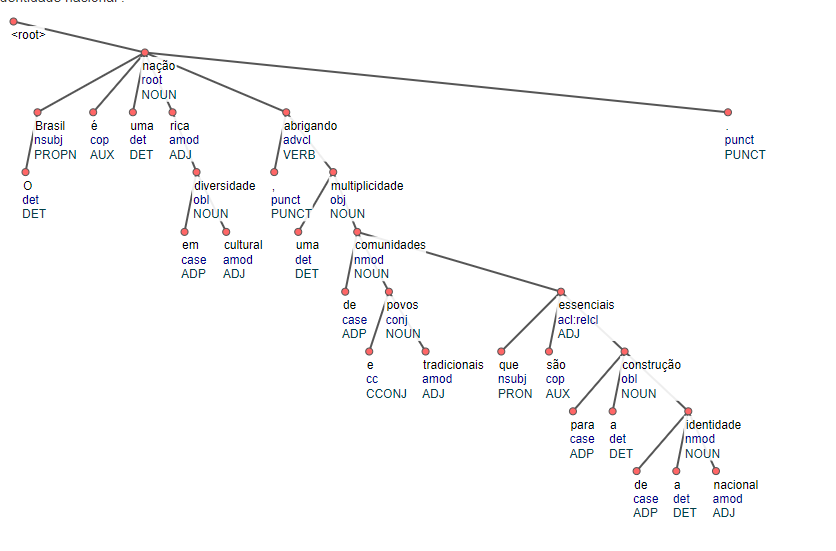

## Metricas
1. Sentence: A sentence is defined as a group of words (including sentence frag-ments) punctuated with a sentence-final punctuation mark, including a peri-od, exclamation mark, question mark, and occasionally elliptical marks orclosing quotation marks.
2. Clause: A clause is a structure with a subject and a finite verb, including inde-pendent, adjective, adverbial, and nominal clauses, but not non-finite verbphrases, which are included in the definition of verb phrases instead (Hunt1965; Polio 1997).
3. Dependent clause: A dependent clause is defined as a finite adverbial, adjec-tive, or nominal clause (Hunt 1965; Cooper 1976; Kameen 1979).
4. T-unit: A T-unit consists of a main clause and any dependent clause or non-clausal structure attached or embedded in it (Hunt 1970)
5. Coordinate phrase: Coordinate adjective, adverb, noun, and verb phrases arecounted as coordinate phrases.
6. Complex nominal: Complex nominals include (1) noun phrases with one ormore of the following pre- or post-modifiers: adjective, possessive, preposi-tional phrase, adjective clause, participle, or appositive; (2) nominal clauses,and 3) gerunds and infinitives in subject position (Cooper 1976).

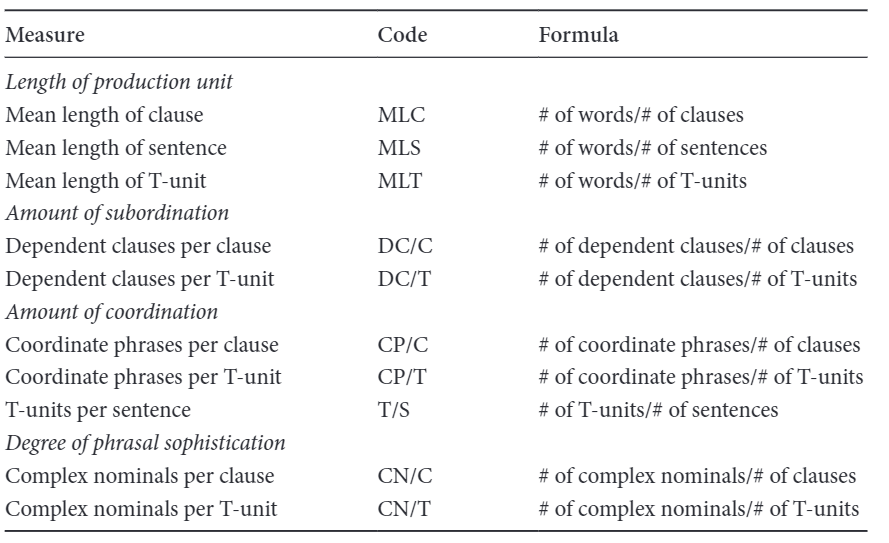

### Contando clausulas/ Syntactic Complexity
No manual do UDPipe, é dito que o campo DEPREL é responsável por indicar a relação de cada token com a raiz, "correspond to structural categories of the dependent". Dentre essas relações, existem o tipo de relação "Clauses" https://universaldependencies.org/u/dep/index.html

csubj
ccomp
xcomp
advcl
acl



In [302]:
def count_func(sentence, func):
  return len([token for token in sentence if(func(token))])

In [303]:
def is_clause(token):
  for deprel in ["csubj","ccomp","xcomp","advcl","acl"]:
    if deprel in token["deprel"]:
      return True
  return False

total_clauses = sum([count_func(sentence,is_clause) for sentence in sentences])
total_clauses

21

In [304]:
def is_dependent_clause(token):
  for deprel in ["advcl","acl"]:
    if deprel in token["deprel"]:
      return True
  return False

total_dependent_clauses = sum([count_func(sentence,is_dependent_clause) for sentence in sentences])
total_dependent_clauses

14

In [305]:
def is_Coordination(token):
  for deprel in ["conj","cc"]:
    if deprel in token["deprel"]:
      return True
  return False

total_Coordinations = sum([count_func(sentence,is_Coordination) for sentence in sentences])
total_Coordinations

44

In [306]:
def is_T_Unit(token):
  pass

In [307]:
def count_token(sentence):
  return len(sentence)

total_tokens = sum([count_token(sentence) for sentence in sentences])
total_tokens

466

In [308]:
total_sentences = len(sentences)

In [309]:
MLC = total_tokens/total_clauses# of words/# of clauses
MLS = total_tokens/total_sentences# of words/# of sentences
# # MLT # of words/# of T-units
DCC = total_dependent_clauses/total_clauses # of dependent clauses/# of clauses
# # DC/T # of dependent clauses/# of T-units
CPC = total_Coordinations/total_clauses # of coordinate phrases/# of clauses
# CPT =  # of coordinate phrases/# of T-units

In [310]:
MLC,MLS,DCC,CPC

(22.19047619047619, 35.84615384615385, 0.6666666666666666, 2.0952380952380953)

### Profundidades na árvore

In [311]:
profundidade_media = np.mean([profundidade_maxima(sentence.to_tree()) for sentence in sentences])
profundidade_media

6.461538461538462

In [312]:
profundidade_max = np.max([profundidade_maxima(sentence.to_tree()) for sentence in sentences])
profundidade_max

11

In [313]:
tokens = [token for sentence in sentences for token in sentence if token["upos"] !="PUNCT" ]

In [314]:
MLC,MLS,DCC,CPC,profundidade_media,profundidade_max

(22.19047619047619,
 35.84615384615385,
 0.6666666666666666,
 2.0952380952380953,
 6.461538461538462,
 11)

### LEXICAL RICHNESS MEASURES

multidimensional feature of a learner’s language use that consists of the following four interrelated components: lexical density, lexical sophistication, lexical variation, and number of errors in vocabulary use.

#### Lexical density,
originally coined by Ure (1971),refers to the ratio of the number of lexical (as opposed to grammatical) words to the total number of words in a text.

For this study, we defined lexical words as
* nouns,  UPOS NOUN
* adjectives,  UPOS ADJ
* verbs (excluding modal verbs, auxiliary verbs, “be,” and “have”), and
* adverbs with an adjectival base, including those that can function as both an adjective and adverb (e.g., “fast”) and those formed by attaching the –ly suffix to an adjectival root (e.g., “particularly”). https://universaldependencies.org/u/dep/advmod.html

In [315]:
def is_lexical_words(token):
  if token["upos"] in ["NOUN","ADJ","VERB"]:
    return True
  if "advmod" in token["deprel"]:
    return True
  return False

lexical_density = sum([count_func(sentence,is_lexical_words) for sentence in sentences])
lexical_density, lexical_density/total_tokens

(182, 0.3905579399141631)

#### Lexical sophistication,

Harley and King (1989) proposed a verb sophistication measure, which was computed as the ratio of the number of sophisticated verb types (Tsverb) to the total number of verbs (Nverb) in a text. They defined sophisticated verbs as verbs not on the list of 20 or 200 most frequent French verbs (?????)

In [316]:
corpus_potuguese = "https://www.wordfrequency.info/port/samples/port_40k_lemmas.txt"

r = requests.get(corpus_potuguese)
corpus = r.text
print(corpus[:100])


* This sample data (every tenth word) is taken from the one billion word "Web/Dialects" portion of t


In [317]:
corpus_lines = corpus.split('\n')[7:]

In [318]:
corpus_lines[0].split('\t')

['5', 'ser', 'v', '24871051', '1061007\r']

In [319]:
column_names = ['ID', 'lemma', 'PoS', 'freq', 'texts']
df = pd.DataFrame([line.split('\t') for line in corpus_lines if line.strip()], columns=column_names)
df.head()

,ID,lemma,PoS,freq,texts
0,5,ser,v,24871051,1061007\r
1,15,se,p,7094640,889101\r
2,25,poder,v,3985432,766259\r
3,35,como,r,2345145,632176\r
4,45,quando,r,1871057,551109\r


In [320]:
df["freq"]  = df["freq"].apply(lambda x: int(x))

In [321]:
df = df[df["PoS"] == "v"]
df.sort_values(by="freq",inplace=True,ascending=False)
df.head()

<ipython-input-321-b77919edb534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="freq",inplace=True,ascending=False)


,ID,lemma,PoS,freq,texts
0,5,ser,v,24871051,1061007\r
2,25,poder,v,3985432,766259\r
14,145,criar,v,503132,254073\r
19,195,tomar,v,404914,199085\r
37,375,sofrer,v,216129,123309\r


In [322]:
top_200_verbs = list(df["lemma"])
len(top_200_verbs)

551

In [323]:
"ser" in top_200_verbs

True

In [324]:
def is_sophisticated_verb(token):
  if token["upos"] != "VERB":
    return False
  if token["lemma"] in top_200_verbs:
    return False
  return True

sophisticated_verbs = sum([count_func(sentence,is_sophisticated_verb) for sentence in sentences])
verbs = sum([count_func(sentence,lambda x: x["upos"] == "VERB") for sentence in sentences])
sophisticated_verbs,verbs,sophisticated_verbs/verbs

(29, 31, 0.9354838709677419)

In [325]:
[token for token in tokens if (token["upos"] == "VERB") and ( is_sophisticated_verb(token))]

[{'id': 10,
  'form': 'enfrenta',
  'lemma': 'enfrentar',
  'upos': 'VERB',
  'xpos': None,
  'feats': {'Mood': 'Ind',
   'Number': 'Sing',
   'Person': '3',
   'Tense': 'Pres',
   'VerbForm': 'Fin'},
  'head': 0,
  'deprel': 'root',
  'deps': None,
  'misc': None},
 {'id': 16,
  'form': 'vão',
  'lemma': 'ir',
  'upos': 'VERB',
  'xpos': None,
  'feats': {'Mood': 'Ind',
   'Number': 'Plur',
   'Person': '3',
   'Tense': 'Pres',
   'VerbForm': 'Fin'},
  'head': 14,
  'deprel': 'acl:relcl',
  'deps': None,
  'misc': None},
 {'id': 27,
  'form': 'arraigado',
  'lemma': 'arraigar',
  'upos': 'VERB',
  'xpos': None,
  'feats': {'Gender': 'Masc', 'Number': 'Sing', 'VerbForm': 'Part'},
  'head': 26,
  'deprel': 'acl',
  'deps': None,
  'misc': None},
 {'id': 2,
  'form': 'ressalta',
  'lemma': 'ressaltar',
  'upos': 'VERB',
  'xpos': None,
  'feats': {'Mood': 'Ind',
   'Number': 'Sing',
   'Person': '3',
   'Tense': 'Pres',
   'VerbForm': 'Fin'},
  'head': 19,
  'deprel': 'advcl',
  'deps': 

#### Lexical Variation
Type–token ratio (TTR), that is, the ratio of the number of word types (T) to the number of words (N) in a text



In [326]:
tokens = [token for sentence in sentences for token in sentence if token["upos"] !="PUNCT" ]
types = set([token["form"] for sentence in sentences for token in sentence]) # set garante unicidade
ttr  = len(types)/len(tokens)
ttr

0.5107398568019093